# Book Publishing

In [1]:
# Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Read data
uk_pub = pd.read_csv("data/Book Publishing Salary Transparency (UK) - Form responses 1.csv")
pub = pd.read_csv("data/#PUBLISHINGPAIDME - Form Responses 1.csv")

## UK Publishing

#### Checking Data

In [4]:
uk_pub.head()

,Salary,Employment Status,Race / Ethnicity,Gender Identity,Sexual Orientation,Years in Pubishing,Years of Overall Experience
0,£36k,Full-time,White,Woman (cisgender),Straight,3,9
1,"23,000 per annum",Full-time,Black african,Woman (cisgender),Bisexual,2,2
2,"£23,000",Full-time,British Indian,Woman (cisgender),Straight,1,4
3,"£28,000",Full-time,White British,Woman (cisgender),Pansexual,3,6
4,£115 per day,Contract,British Indian,Woman (cisgender),Straight,7,10


In [5]:
uk_pub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1021 entries, 0 to 1020
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Salary                       1021 non-null   object
 1   Employment Status            1021 non-null   object
 2   Race / Ethnicity             1011 non-null   object
 3   Gender Identity              1020 non-null   object
 4   Sexual Orientation           1008 non-null   object
 5   Years in Pubishing           1008 non-null   object
 6   Years of Overall Experience  986 non-null    object
dtypes: object(7)
memory usage: 56.0+ KB


In [6]:
uk_pub.shape

(1021, 7)

#### Cleaning Data

In [ ]:
# Drop all columns that we will not be working with
uk_pub = uk_pub.loc[:, 'Salary':'Years of Overall Experience']

In [7]:
# Check missing values
uk_pub.isnull().sum()

Salary                          0
Employment Status               0
Race / Ethnicity               10
Gender Identity                 1
Sexual Orientation             13
Years in Pubishing             13
Years of Overall Experience    35
dtype: int64

In [ ]:
# Rename misspelling in column name
uk_pub.rename(columns={'Years in Pubishing':'Years in Publishing'}, inplace=True)

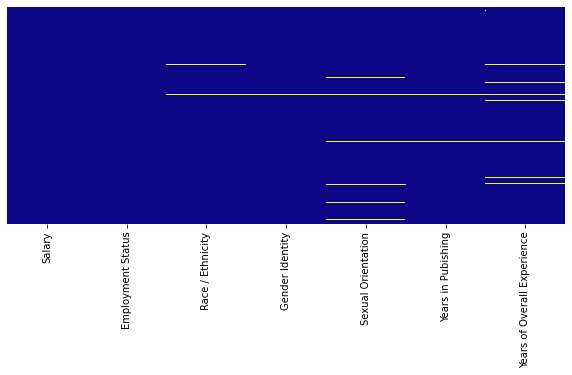

In [8]:
# Visualise missing data
fig, ax = plt.subplots(figsize=(10,4))
ax = sns.heatmap(uk_pub.isnull(),yticklabels=False,cbar=False,cmap='plasma')

In [10]:
uk_pub.head()

,Salary,Employment Status,Race / Ethnicity,Gender Identity,Sexual Orientation,Years in Publishing,Years of Overall Experience
0,£36k,Full-time,White,Woman (cisgender),Straight,3,9
1,"23,000 per annum",Full-time,Black african,Woman (cisgender),Bisexual,2,2
2,"£23,000",Full-time,British Indian,Woman (cisgender),Straight,1,4
3,"£28,000",Full-time,White British,Woman (cisgender),Pansexual,3,6
4,£115 per day,Contract,British Indian,Woman (cisgender),Straight,7,10


#### Years in Publishing Column

In [11]:
# Replace all instances of 'Less than 1' to 0 in 'Years in Publishing' column
uk_pub.loc[uk_pub['Years in Publishing'] == 'Less than 1', 'Years in Publishing'] = 0

In [12]:
# Convert 'Years in Publishing' to numeric data type
uk_pub['Years in Publishing'] = pd.to_numeric(uk_pub['Years in Publishing'], errors='coerce')

In [31]:
# Check value counts for years in publishing
uk_pub['Years in Publishing'].value_counts(dropna=False)

4.0     155
3.0     150
5.0     126
2.0     118
7.0      75
6.0      67
1.0      61
0.0      53
8.0      52
10.0     34
9.0      25
12.0     22
11.0     20
15.0     13
14.0     12
13.0     10
20.0      8
16.0      5
18.0      4
19.0      3
21.0      2
24.0      2
25.0      1
27.0      1
26.0      1
17.0      1
Name: Years in Publishing, dtype: int64

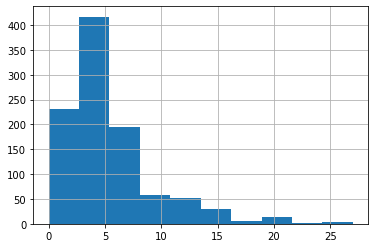

In [20]:
uk_pub['Years in Publishing'].hist();

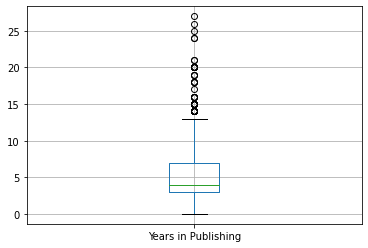

In [30]:
uk_pub.boxplot(column=['Years in Publishing']);

In [26]:
uk_pub[['Years in Publishing']].describe()

,Years in Publishing
count,1007.000000
mean,5.342602
std,4.129225
min,0.000000
25%,3.000000
50%,4.000000
75%,7.000000
max,27.000000


In [29]:
# Due to the number of outliers we will fill the null values with median
uk_pub['Years in Publishing'].fillna(uk_pub['Years in Publishing'].median(), inplace=True)

In [ ]:
# Do I need to do anything to deal with the outliers?

#### Years of Overall Experience Column

In [65]:
uk_pub['Years of Overall Experience'].value_counts(dropna=False)

6.0     132
5.0     123
3.0     118
4.0     112
7.0     100
10.0     66
8.0      65
2.0      55
12.0     37
9.0      35
11.0     25
1.0      25
0.0      21
14.0     20
15.0     18
13.0     15
20.0      8
19.0      6
16.0      6
17.0      6
21.0      6
18.0      4
25.0      3
23.0      2
24.0      2
26.0      2
30.0      1
28.0      1
Name: Years of Overall Experience, dtype: int64

In [42]:
# Replace all instances of 'Less than 1' to 0 in 'Years in Publishing' column
uk_pub.loc[uk_pub['Years of Overall Experience'] == 'Less than 1', 'Years of Overall Experience'] = 0

In [57]:
uk_pub.loc[uk_pub['Years of Overall Experience'] == 'More than 30']

,Salary,Employment Status,Race / Ethnicity,Gender Identity,Sexual Orientation,Years in Publishing,Years of Overall Experience


In [56]:
# Drop row where data is not numeric
uk_pub.drop(uk_pub[uk_pub['Years of Overall Experience']  == 'More than 30'].index, inplace = True)

In [60]:
# Convert 'Years in Publishing' to numeric data type
uk_pub['Years of Overall Experience'] = pd.to_numeric(uk_pub['Years of Overall Experience'], errors='coerce')

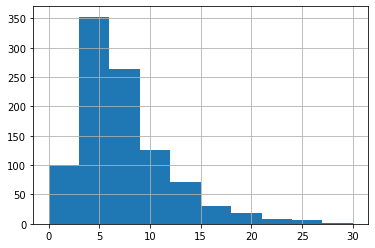

In [62]:
uk_pub['Years of Overall Experience'].hist();

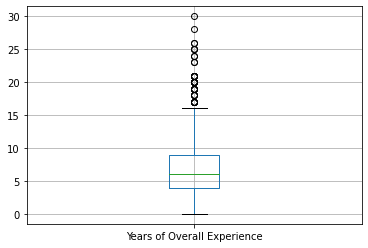

In [63]:
uk_pub.boxplot(column=['Years of Overall Experience']);

In [64]:
# Due to the number of outliers we will fill the null values with median
uk_pub['Years of Overall Experience'].fillna(uk_pub['Years of Overall Experience'].median(), inplace=True)

In [ ]:
# Do I need to do anything to deal with the outliers?

#### Gender Identity Column

In [38]:
# Check value counts of Gender Identity
uk_pub['Gender Identity'].value_counts()

Woman (cisgender)    884
Man (cisgender)      110
Prefer not to say     14
Non-binary             7
Name: Gender Identity, dtype: int64

In [35]:
uk_pub = uk_pub.groupby('Gender Identity').filter(lambda x: len(x) > 5)

In [39]:
# Remove '(cisgender)' from 'Woman' and 'Man'
uk_pub.loc[uk_pub['Gender Identity'] == 'Woman (cisgender)', 'Gender Identity'] = 'Woman'
uk_pub.loc[uk_pub['Gender Identity'] == 'Man (cisgender)', 'Gender Identity'] = 'Man'

In [40]:
# Check value counts of Gender Identity
uk_pub['Gender Identity'].value_counts()

Woman                884
Man                  110
Prefer not to say     14
Non-binary             7
Name: Gender Identity, dtype: int64

In [ ]:
# Need to encode these using pd.get_dummies later on

#### Sexual Orientation Column

In [82]:
uk_pub['Sexual Orientation'].value_counts(dropna=False)

Straight    745
LGBTQ       269
Name: Sexual Orientation, dtype: int64

In [79]:
# Fill null values with mode
uk_pub['Sexual Orientation'].fillna(uk_pub['Sexual Orientation'].mode()[0], inplace=True)

In [81]:
# Group all non-straight into a single category
uk_pub.loc[uk_pub['Sexual Orientation'] != 'Straight', 'Sexual Orientation'] = 'LGBTQ'

#### Race/Ethnicity Column

In [84]:
uk_pub['Race / Ethnicity'].unique()

array(['White', 'Black african ', 'British Indian', 'White British',
       'British Indian ', 'White British ', 'White Australian',
       'Black Caribbean ', 'Pakistani', 'Caucasian ', 'Black British ',
       'Black', 'White/Irish', 'Caucasian', 'White ', 'Asian',
       'Caucasian / Greek', 'Chinese', 'White, British',
       'White (Not British)', 'White/irish', 'White/British',
       'British Asian', 'Mixed (White British and British Indian)',
       'Mixed', 'Black/African-British', 'White (other)',
       'Mixed race - White and East Asian', 'white', 'White European',
       'South Asian ', 'White/European', 'South Asian', 'white british',
       'Mixed white and asian', 'White british', 'Black British',
       'Mixed - White/Asian', 'South-Asian', 'white (other)',
       'Mixed (White and Asian)', 'Mixed Afro/Indo Caribbean and White',
       'White/Irish ', 'British Asian ', 'South Asian origin',
       'British Asian - Indian ', 'Black African ',
       'British Asian - Ind

In [92]:
# Fill null values with mode
uk_pub['Race / Ethnicity'].fillna(uk_pub['Race / Ethnicity'].mode()[0], inplace=True)

In [161]:
# Correct values before applying function
uk_pub.loc[uk_pub['Race / Ethnicity'] == 'Not white', 'Race / Ethnicity'] = 'Other'
uk_pub.loc[uk_pub['Race / Ethnicity'] == 'Whote', 'Race / Ethnicity'] = 'White'
uk_pub.loc[uk_pub['Race / Ethnicity'] == 'British Insian', 'Race / Ethnicity'] = 'British Indian'

In [148]:
# Check for matches of specific races
uk_pub[uk_pub['Race / Ethnicity'].str.match('Chinese')]['Race / Ethnicity']

32           Chinese
77           Chinese
252          Chinese
462    Chinese/White
492          Chinese
616          Chinese
653          Chinese
734          Chinese
Name: Race / Ethnicity, dtype: object

In [165]:
# Function for simplifying race
def simplify_race(x):
    if 'mixed' in x.lower():
        return 'Mixed'
    elif 'black' in x.lower() or 'bame' in x.lower():
        return 'Black'
    elif 'asian' in x.lower() or 'chinese' in x.lower() or 'indian' in x.lower() or \
                                 'pakistani' in x.lower() or 'bangladeshi' in x.lower():
        return 'Asian'
    elif 'white' in x.lower():
        return 'White'
    else:
        return 'Other'

In [169]:
uk_pub['Race / Ethnicity'] = uk_pub['Race / Ethnicity'].apply(simplify_race)

In [170]:
uk_pub['Race / Ethnicity'].nunique()

5

In [171]:
uk_pub.head()

,Salary,Employment Status,Race / Ethnicity,Gender Identity,Sexual Orientation,Years in Publishing,Years of Overall Experience
0,£36k,Full-time,White,Woman,Straight,3.0,9.0
1,"23,000 per annum",Full-time,Black,Woman,LGBTQ,2.0,2.0
2,"£23,000",Full-time,Asian,Woman,Straight,1.0,4.0
3,"£28,000",Full-time,White,Woman,LGBTQ,3.0,6.0
4,£115 per day,Contract,Asian,Woman,Straight,7.0,10.0


#### Employment Status Column

In [178]:
uk_pub['Employment Status'].unique()

array(['Full-time', 'Contract', 'Part-time', 'Other'], dtype=object)

In [173]:
# Function for simplifying employment status
def simplify_employment_status(x):
    if 'part-time' in x.lower():
        return 'Part-time'
    elif 'full-time' in x.lower():
        return 'Full-time'
    elif 'contract' in x.lower():
        return 'Contract'
    else:
        return 'Other'

In [176]:
uk_pub['Employment Status'] = uk_pub['Employment Status'].apply(simplify_employment_status)

#### Salary Column